set shit up

In [36]:
%gui asyncio
# %matplotlib inline
%matplotlib notebook
import asyncio
import struct
from bleak import discover, BleakClient # BleakScanner
import ipywidgets as widgets
import time
import numpy as np
import random as rn
# from jupyterplot import ProgressPlot
# from IPython.display import clear_output
import matplotlib.pyplot as plt

print('done')


done


create the classes we need

In [39]:
class PhysBryk(object):
    
    def __init__(self, device=None):
        self._device = device
           
    def set_device(self, ble_device):
        self._device = ble_device
        
    def get_address(self):
        return self._device.address
    
    def get_name(self):
        return self._device.name
    
    def get_battery(self):
        """Calculates the voltage from the reading of the on board battery sensor."""
        return (self._core_service.battery * 3.3) / 65536 * 2

print("done")

done


now the functions

In [40]:
async def bryks_discover():
    """Discover all PhysBryks.
    
    Returns: list of all discovered PhysBryks
    """
    bryks = []
    print('Searching...')
    devices = await discover()
    print(f'{len(devices)} BLE devices found')
    
    for d in devices:
        if 'PhysBryk' in d.name:
            b = PhysBryk(d)
            bryks.append(b)
    
    return bryks
    
print('done')

done


search for physbryks and list them by name and address

In [43]:
for bryk_list in await asyncio.gather(bryks_discover()):
    for b in bryk_list:
        print(b.get_name())

Searching...
4 BLE devices found
PhysBrykAlpha


now lets connect

In [ ]:
b.

Everything below here is legacy

In [2]:

class PhysBrykWeb(object):

    def __init__(self):
        self._record_btn = widgets.ToggleButton(description="Record")
#         self._value = 0
#         self._time = 0
        self._sensor1_data = np.empty(0)
        self._sensor2_data = np.empty(0)
        self._times = np.empty(0)
        # pp = ProgressPlot()
        # self._out = widgets.Output()
        self._fig = plt.figure()
        self._ax1 = self._fig.add_subplot(121)
        self._ax2 = self._fig.add_subplot(122)
        plt.ion()

#         self._fig,self._ax = plt.subplots()
#         self._ax.scatter(self._times,self._sensor1_data)
        self._fig.show()
        self._fig.canvas.draw()
        display(self._record_btn)
        self.old1 = 0
        self.old2 = 0
        self.old_time = 0

    async def log(self):
#         clear_output(wait=True)
        start_time = time.time()
        
        while True:
            if self._record_btn.value:
                value1 = rn.randint(0,255)
                value2 = rn.randint(0,255)
                elapsed_time = time.time() - start_time
                self._sensor1_data = np.concatenate(([value1],self._sensor1_data[0:99]),)
                self._sensor2_data = np.concatenate(([value2],self._sensor2_data[0:99]),)
                self._times = np.concatenate(([elapsed_time],self._times[0:99]),)
                self.output([value1,self.old1], [value2, self.old2], [elapsed_time, self.old_time])
                self.old1 = value1
                self.old2 = value2
                self.old_time = elapsed_time
            await asyncio.sleep(1)  # use this to temporarily give up control of the event loop to allow scheduling checkbox changes

    def start(self):
        print('starting')
        asyncio.ensure_future(self.log())
        
    def output(self,s1, s2, t):
#         print('output')
#         self._ax1.clear()
#         self._ax1.plot(self._times,self._sensor1_data)
#         self._ax2.clear()
#         self._ax2.plot(self._times,self._sensor2_data)
        self._ax1.plot(t, s1, color='blue')
        self._ax2.plot(t, s2)
#         self._fig.canvas.draw()

        


<IPython.core.display.Javascript object>


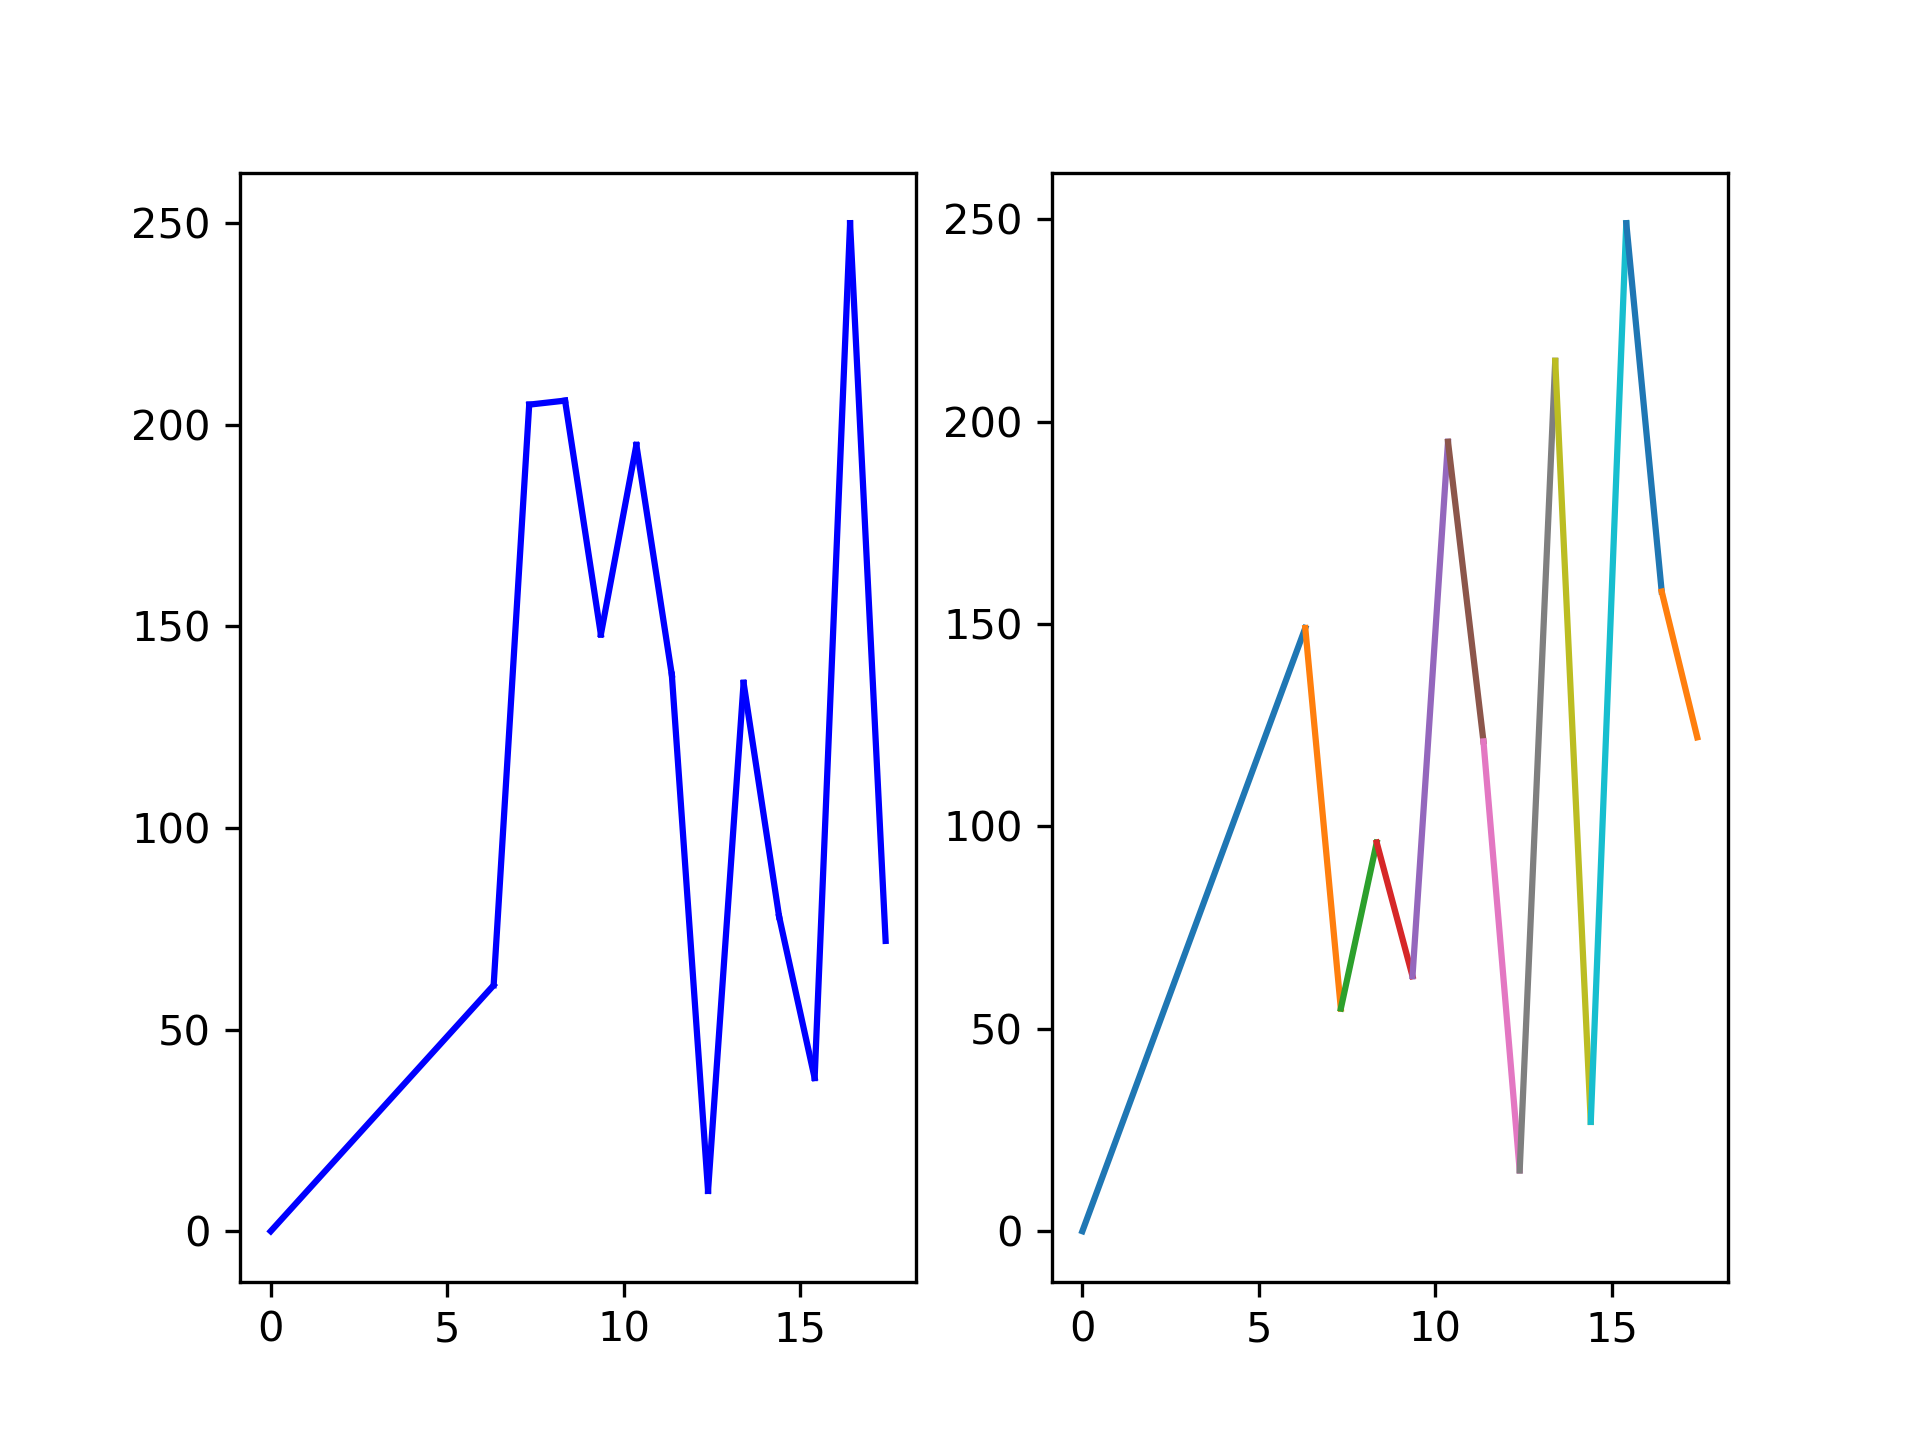

ToggleButton(value=False, description='Record')

starting
done


In [4]:
thys_bryk = PhysBrykWeb()
thys_bryk.start()

print('done')